<a href="https://colab.research.google.com/github/GUSTAVObbarbosa/projetos_iniciais/blob/main/Evolu%C3%A7%C3%A3o_do_COVID_19_e_o_programa_de_vacina%C3%A7%C3%A3o_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Evolução do COVID-19 e o programa de vacinação no Brasil

A pandemia de COVID-19 teve origem na China, sendo os seus primeiros casos detectados em novembro de 2019. Essa é uma doença infecciosa transmida pelo Coronavírus e sua contaminação ocorre através da tosse, por meio de gotículas e aerossóis. 

Essa se mostrou altamente transmissível com elevadas taxas de contaminação em todos os países. 

Como muito foi discutido ao decorrer da pandemia, a única solução real para o problema foi e, ainda é, a vacinação. Sendo assim, o objetivo desse estudo é apresentar um panorama geral da evolução dos casos no mundo e no Brasil e as consequências decorrentes do programa de vacinação.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>


## Obtenção dos Dados

Os dados utulizados nessa análise são provenientes do projeto <i>Our World in Data</i>, o qual é atualizado diariamente com base nos dados oficiais de 217 países.

Sabemos que os números de casos e mortes confirmadas não são 100% precisos, uma vez que nem sempre todas as pessoas foram testadas ou tiveram um diagnóstico preciso do óbito, mas esses servem para ilustrar a avanço da doença ao longo do tempo. 

A base de dados utilizada apresenta diversas variáveis ao longo do tempo desde o primeiro caso de confirmado na China até os dias atuais. Entre elas, abaixo segue o dicionário das principais utilizadas:

### Dicionário de Variáveis
* `date`: data da ocorrência;
* `total_death_per_milion`: total de mortes por milhão de pessoas;
* `total_vaccinations_per_milion`: total de pessoas vacinadas por milhão;
* `new_cases`: total de novos casos confirmados;
* `new_cases_smoothed`: média móvel de novos casos.

### Importando os dados do COVID-19

Os dados estão dispoíveis no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data). Nesse trabalho, usaremos o formato `csv` neste projeto.

## Análise Exploratória dos Dados

Para a análise, os principais pacotes utilizados foram <i>Pandas</i> e <i>Matplotlib</i>, dentro outros abaixo:

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
import datetime
import numpy as np
import warnings

warnings.filterwarnings('ignore')

covid_dataset = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

usecols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 
       'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million','new_deaths_smoothed_per_million', 
       'reproduction_rate','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
       'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
       'people_fully_vaccinated_per_hundred', 'stringency_index', 'population', 
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
       'gdp_per_capita', 'extreme_poverty', 'female_smokers', 'male_smokers']

df_covid = pd.read_csv(covid_dataset,
                       usecols=usecols,
                       index_col='date',
                       parse_dates=True)

df_covid['date2'] = df_covid.index

A fim de faciliar a visualização dos dados, já selecionamos as colunas de interesse, através da variável `usecols`.

Para se ter uma ideia inicial da base de dados, abaixo temos as 5 primeiras linhas de informações: 

In [2]:
# verificando as primeiras entradas
df_covid.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,female_smokers,male_smokers,date2
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,NaN,NaN,2020-02-24
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,NaN,NaN,2020-02-25
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,NaN,NaN,2020-02-26
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,NaN,NaN,2020-02-27
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,NaN,NaN,2020-02-28


##Panorama geral da pandemia

O primeiro caso de covid-19 confirmado foi em meados de novembro de 2019, em Wuhan, na China. A partir disso, os caso começaram a se multiplicar na China e foi se espalhando pelo mundo.

Por mais que a origem tenha sido na China, os casos confirmados se espalharam muito mais rapidamente em outros países. A fim de visualizar o crescimento nos números de <b>casos confirmados</b> em diversos países, o gráfico de barras corridos ou <i>bar race chart</i> nos dá uma noção geral dessa evolução.

Para isso, plotamos o gráfico com os top 10 países com maior número de casos até a data de 31/12/2021.

In [9]:
#Gerando um dataframe somente com os países de interesse
df_covid_top10 = df_covid[['location', 'total_cases', 'date2']]

#Levantando os 10 países com mais casos de covid-19 confirmados em 22/05/2022
df_covid_top10.loc[df_covid_top10.date2 == '2021-12-31'].sort_values(by='total_cases', ascending=False).head(20)

,location,total_cases,date2
date,,,
2021-12-31,World,288690598.0,2021-12-31
2021-12-31,High income,135107921.0,2021-12-31
2021-12-31,Europe,88593236.0,2021-12-31
2021-12-31,Upper middle income,86368456.0,2021-12-31
2021-12-31,Asia,84936560.0,2021-12-31
2021-12-31,Lower middle income,65650334.0,2021-12-31
2021-12-31,North America,65042689.0,2021-12-31
2021-12-31,European Union,56203083.0,2021-12-31
2021-12-31,United States,54835685.0,2021-12-31


Considerando apenas os países contidos na lista, iremos utilizar dados dos seguintes países:
* Estados Unidos
* India
* Brazil
* Reino Unido
* Russia
* França
* Turquia
* Alemanha
* Espanha
* Irã
* Italia

A China não aparece nessa lista dos top 10, mas uma vez que foi lá que a doença teve início, iremos inclui-lá na lista. Além da China, a Italia tambémm não aparece, mas em 2021, ela teve destaque nas mídias devido a elevada taxa de transmissão e consequente moralidade, sendo necessário um longo período de <i>lockdown</i>. Sendo assim, a lista será contida pela top 10 + China e Italia.

In [10]:
#Filtrando somente os países de interesse
location = ['China','United States', 'India', 'Brazil', 'France', 'Germany', 'United Kingdom', 'Russia', 'South Korea', 'Italy', 'Turvey']

df_covid_top10 = df_covid_top10[df_covid_top10['location'].isin(location)]

Um vez que temos os países definidos e filtrados, precisamos formatar a tabela de forma que cada coluna represente o total de casos confirmados de cada um dos países. Além disso, para plotar o Bar Race Chart, iremos utilizar o pacote <i>bar_chart_race</i> e, para isso, será necessário instalá-lo.

In [11]:
#Formatando o dataframe
df_covid_top10 = df_covid_top10.pivot_table(
                                            values='total_cases',
                                            index='date',
                                            columns='location',
                                            fill_value=0
                                            )

df_covid_top10.tail()

location,Brazil,China,France,Germany,India,Italy,Russia,South Korea,United Kingdom,United States
date,,,,,,,,,,
2022-06-08,31315777,885249,29767548,26660652,43197522,17566061,18094054,18200346,22439681,85214036
2022-06-09,31360850,885454,29807699,26738530,43205106,17589595,18097767,18209650,22449760,85329656
2022-06-10,31417341,885634,29807793,26803867,43213435,17611607,18101372,18218078,22459358,85468816
2022-06-11,31445137,885897,29807699,26803867,43222017,17634065,18104944,18225460,22459358,85500976
2022-06-12,31456865,886073,29807699,26809245,43230101,17653375,18108285,18229288,22459358,85515795


In [6]:
#Instalando o pacote Bar Chart Race
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 12.8 MB/s 


In [ ]:
#Plotando o gráfico

import bar_chart_race as bcr

bcr.bar_chart_race(df=df_covid_top10, 
                   filename=None,
                   bar_size=.95,
                   steps_per_period=10,
                   period_length=500,
                   cmap='tab10',
                   period_summary_func=lambda v, r: {'x':.99,
                                                     'y':.18,
                                                     's': f'Total de casos confirmados: {v.nlargest(6).sum():,.0f}',
                                                     'ha': 'right', 'size': 8, 'family':'Courier New'}
                  )

Como podemos verificar no gráfico, a doença teve uma rápida evolução nos casos na China, porém a Itália rapidamente tomou o topo e após isso, aos poucos o Brasil e, posteriormente, Estados Unidos tiveram uma elevada evolução nos casos. 

O mais interessante é que, por mais que a China tenha sido origem da doença, rapidamente ela foi para a base do gráfico. Isso pode ser explicado pelo fato de que os orientais possuem uma cultura de prevenção de doenças, como por exemplo o uso frequente de máscaras e forte política de testagem em massa e rastreio dos casos em andamento. Além disso, o <i>lockdown</i> é levado a sério em regiões com casos confirmados.

Outra forma de análisar a evolução dos casos desses países em questão, é no gráfco de linhas. O gráfico abaixo permite filtrar somente os países desejados permitindo uma melhor visualização.

In [ ]:
#Importar o pacote plotly
import plotly.express as px

#Incluindo a coluna de data np dataframe
df_covid_top10['date2'] = df_covid_top10.index

df = df_covid_top10

fig = px.line(df, 
              x="date2", 
              y=df.columns,
              hover_data={'date2': "|%B %d, %Y"})

fig.update_layout(
    title='Evolução dos casos de covid-19',
    xaxis_title='Período',
    yaxis_title='Casos confirmados',
    legend_title='Países'
)

fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

fig.show()

##Panorama do covid-19 no Brasil

No Brasil, o primeiro caso foi confirmado em 26/02/2020. Após essa data, o número de casos apresentou um crescimento acentuado, mas ainda não tão grande quanto os anos anteriores. Provavelmente, isso se deve ao fato de que no início as políticas de <i>lockdown</i> estavam sendo mais aderiadas pela população.

In [ ]:
#Separar um dataframe apenas com dados do BR
df_covid_br = df_covid.loc[df_covid.iso_code == 'BRA']

#Primeiro caso confirmado
df_covid_br.date2.min()

Timestamp('2020-02-26 00:00:00')

Para melhor visualizar o <i>overview</i>, abaixo plotamos um gráfico com a <b>média móvel dos casos confirmados</b> e <b>total absoluto de casos confirmados</b>. Para analisar a evolução, a média móvel é o melhor indicador, uma vez que ela normaliza os dados e suaviza casos de atraso na divulgação dos dados, fato que ocorre principalmente com os casos confirmados aos finais de semana. 

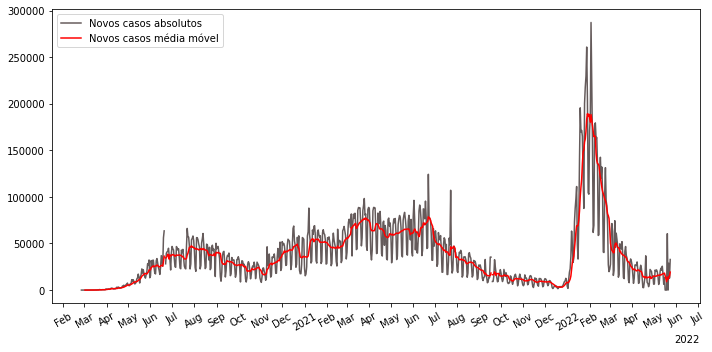

In [ ]:
#Evolução dos casos no Brasil
periodo = df_covid_br['date2']
casos = df_covid_br['new_cases']
casos_media_movel = df_covid_br['new_cases_smoothed']


fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(10,5)
                       )

ax.plot(periodo, casos, color='#655B5B', label='Novos casos absolutos')
ax.plot(periodo, casos_media_movel, 'r', label='Novos casos média móvel')

locator = mdates.AutoDateLocator(maxticks=30)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

#plt.axvspan('2022-01-01', '2022-02-20', -5, 300000, facecolor='#D6D6D6', alpha=0.7)
#plt.axvspan('2021-01-01', '2021-03-20', -5, 300000, facecolor='#D6D6D6', alpha=0.7)

plt.xticks(rotation=30)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Análisando o gráfico, há um pico que chama a atenção, logo no início de 2022. Provavelmente, isso ocorreu devido à um conjunto de fatores, dentre eles o fato de que o programa de vacinação já estava em andamento e já era a segunda virada de ano em pandemia. Esses dois fatores juntos, pode ter gerado um sentimento de alívio (pela vacinação) e cansaço do isolamento que, consequentemente, ocasionou em um relaxamento das medidas preventivas.

No gráfico abaixo destacamos os dois períodos pós reveillon durante a pandemia. E, por mais que no início de 2021 tenha sido mais suave, ainda assim houve um aumento do casos, quando comparado com os meses anteriores.


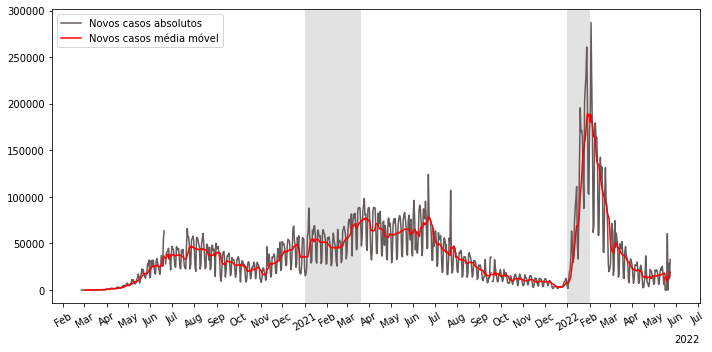

In [ ]:
#Evolução dos casos no Brasil
periodo = df_covid_br['date2']
casos = df_covid_br['new_cases']
casos_media_movel = df_covid_br['new_cases_smoothed']


fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(10,5)
                       )

ax.plot(periodo, casos, color='#655B5B', label='Novos casos absolutos')
ax.plot(periodo, casos_media_movel, 'r', label='Novos casos média móvel')

locator = mdates.AutoDateLocator(maxticks=30)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.axvspan('2022-01-01', '2022-02-01', -5, 300000, facecolor='#D6D6D6', alpha=0.7)
plt.axvspan('2021-01-01', '2021-03-20', -5, 300000, facecolor='#D6D6D6', alpha=0.7)

plt.xticks(rotation=30)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

##A vacinação no Brasil

O programa de vacinação no Brasil teve início em 17/01/21, 326 dias após o primeiro caso confirmado. Foi um programa desafiador com meta de vacinar com pelo menos 2 doses toda a população, mas que teve êxito.

Agora, iremos analisar melhor esses dados. A base de dados utilizada foi a mesma da análise anterior, porém com os dados filtrados somente para o Brasil.

In [ ]:
#Preparando o Dataframe
#Separar um dataframe apenas com dados do BR
df_covid_br = df_covid.loc[df_covid.iso_code == 'BRA']

#Para compararmos as taxas de óbitos e vacinação, é preciso que ambos parâmetros precisam estar parametrizados
#Como a taxa de óbito está por milhão, então iremos criar uma coluna com "vacinados por milhão"
df_covid_br['total_vaccinations_per_milion'] = df_covid_br['total_vaccinations'] / 100000

#Adicionar coluna de data de acordo com o index
df_covid_br['date'] = df_covid_br.index

Para melhor entender os dados, abaixo, plotamos o gráfico com a evolução do <b>total de mortes por milhão</b> e <b>total de vacinados por milhão</b>. Como na base de dados tínhamos apenas a variável <b>total de vacinação</b>, então dividimos esse valor por milhão, para pode parametrizar e comparar de forma igual os indicadores de mortes e vacinação.

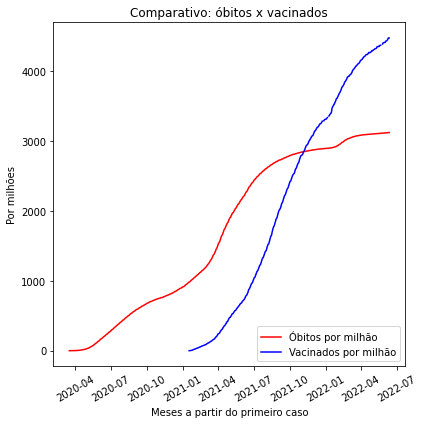

In [30]:
#Plotar gráfico da evolução dos óbitos e vacinação - evolução em data
x  = df_covid_br.index
y1 = df_covid_br['total_deaths_per_million']
y2 = df_covid_br['total_vaccinations_per_milion']

fig, ax = plt.subplots( nrows=1,
                        ncols=1,
                        figsize=(6,6)
                       )

ax.plot(x,y1, 'r', label='Óbitos por milhão')
ax.plot(x,y2, 'b', label='Vacinados por milhão')
ax.set_title('Comparativo: óbitos x vacinados')
ax.set_ylabel('Por milhões')
ax.set_xlabel('Meses a partir do primeiro caso')
plt.xticks(rotation=30)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Como podemos reparar, de forma geral, a taxa de mortalidade teve uma elevada ascensão, mas a partir de meados de julho/2021, começou a estabilizar. Para visualizar de uma forma melhor, elaboramos o mesmo gráfico, mas agora o eixo x sendo o total de dias após o primeiro caso e incluímos uma linha a partir do momento em que a taxa de mortalidade começa a estabilizar. Dessa forma, fica claro que essa estabilização aconteceu após pouco menos de 200 dias após o início da vacinação. Isso indica uma forte relação entre a taxa de vacinação e a estabilização da mortalidade.

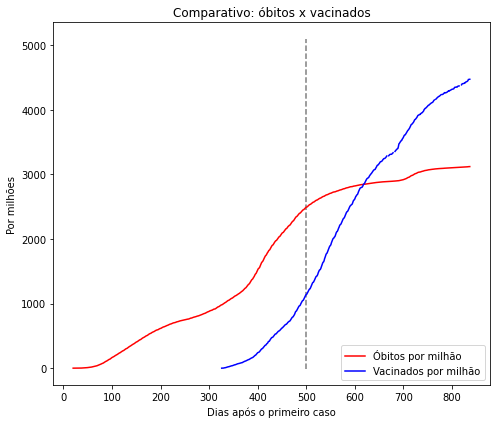

In [31]:
#Plotar gráfico da evolução dos óbitos e vacinação - evolução em dias
x  = list(range(df_covid_br.shape[0]))
y1 = df_covid_br['total_deaths_per_million']
y2 = df_covid_br['total_vaccinations_per_milion']

fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(7,6)
                       )

plt.vlines(x=500, ymin=-10, ymax=5100, color='#7F7F7F', linestyle='--')

ax.plot(x,y1, 'r', label='Óbitos por milhão')
ax.plot(x,y2, 'b', label='Vacinados por milhão')
ax.set_title('Comparativo: óbitos x vacinados')
ax.set_ylabel('Por milhões')
ax.set_xlabel('Dias após o primeiro caso')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Agora, iremos comparar o total de novos casos, mostrados em média móvel como barras, e a taxa de vacinação. Como na base de dados não temos a taxa de vacinação, essa foi calculada dividindo o total de vacinados pelo total da população. 

O gráfico permitirá termos uma noção da transmissao da COVID-19 com base no total de novos casos e os efeitos da vacinação.

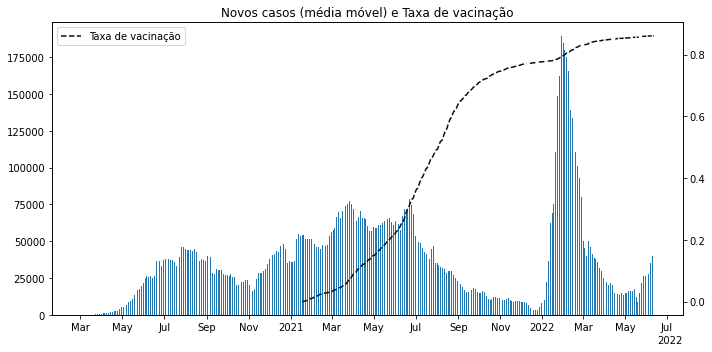

In [42]:
#Incluir taxa de vacinação
df_covid_br['taxa_vacinacao'] = df_covid_br['people_vaccinated']/df_covid_br['population']
vacinacao = df_covid_br['taxa_vacinacao']

#Evolução dos casos no Brasil
periodo = df_covid_br['date']
casos_media_movel = df_covid_br['new_cases_smoothed']


fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(10,5)
                       )

plt.bar(periodo, casos_media_movel, width=0.5, label='Novos casos média móvel')

ax2=ax.twinx()
ax2.plot(periodo, vacinacao, color='#0D0D0D', label='Taxa de vacinação', linestyle='--')

#Formatar as datas do eixo x
locator = mdates.AutoDateLocator(maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.title('Novos casos (média móvel) e Taxa de vacinação')
plt.xticks(rotation=30)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Assim como no gráfico em que comparamos a taxa de mortalidade com a taxa de vacinação, a partir de meados de julho/2021 notamos uma queda nos novos casos. Novamente, podemos dizer que há uma forte relação entre a taxa de vacinação e o número de casos confirmados.

Apesar disso, o pico de casos no início de 2022 chama a atenção, pois aproximadamente 80% da população já estava vacinada. Isso pode ser explicado pelos fatores que já mencionei acima, como o relaxamento das medidas de proteção, e também devido a novas variantes um pouco mais resistentes à vacina. Porém, isso não indica ineficácia da vacina, pois a taxa de mortalidade se manteve estável. 

Para entender melhor essa situação, plotamos o mesmo gráfico, mas agora com as barras representando a média móvel de <b>novos óbitos</b>.

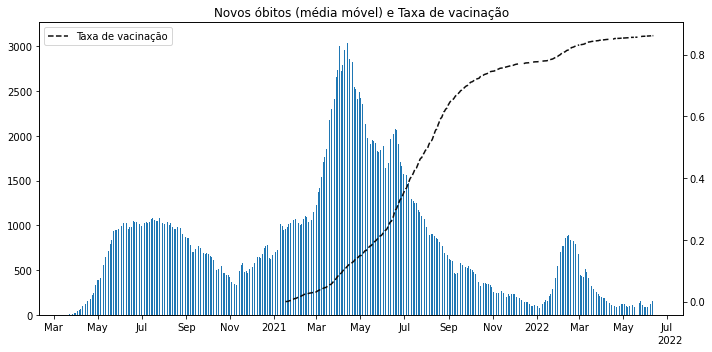

In [43]:
#Evolução dos óbitos no Brasil
obitos_media_movel = df_covid_br['new_deaths_smoothed']

fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(10,5)
                       )

plt.bar(periodo, obitos_media_movel, width=0.5, label='Novos óbitos média móvel')

ax2=ax.twinx()
ax2.plot(periodo, vacinacao, color='#0D0D0D', label='Taxa de vacinação', linestyle='--')

#Formatar as datas do eixo x
locator = mdates.AutoDateLocator(maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.title('Novos óbitos (média móvel) e Taxa de vacinação')
plt.xticks(rotation=30)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Esse gráfico nos mostra que, ainda que tivemos um pico de novos óbitos no início de 2022 (quando comparado aos meses anteriores), esse ainda foi menor quando comparado aos picos de meado de julho/2020 e abril/2021. Mais uma vez, isso evidencia a eficácia da vacina. Provavelmente, se não tivessemos campanha de vacinação, no início de 2022, teríamos uma catastrofe.


Em resumo, no início de 2022, tivemos um pico de casos confirmados, mas com baixa mortalidade, mostrando que a vacina teve um grande papel evitando a ocorrência de casos graves e, consequente, óbito.

## Conclusão

A pandemia de COVID-19 nos deixou vários aprendizados, além das irreparáveis perdas. Através dos dados, podemos concluir que, enquanto não há vacina desenvolvida, devemos manter as principais medidas de prevenção, como uso de máscaras, higiene das mãos e distanciamento. Essas medidas, conteram as taxas de transmmissão e, consequentes, taxas de óbitos.

O programa de vacinação apresentou êxito na contenção dos casos e óbitos confirmados. Isso ressalta a importância da ciência do desenvolvimento de programas de estudo relacionados ao assunto, de forma a permitir um rápido desenvolvimento de uma vacina em casos de novas pandemias. 